<a href="https://colab.research.google.com/github/Chetanya7/Linear-regression/blob/main/California_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [ ]:
data=fetch_california_housing()

In [ ]:
x=data.data[:,[0]]  #np.ndarray
y=data.target #np.ndarray

df = pd.DataFrame(data.data ,columns = data.feature_names )
df['Target']=data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
y.shape

(20640,)

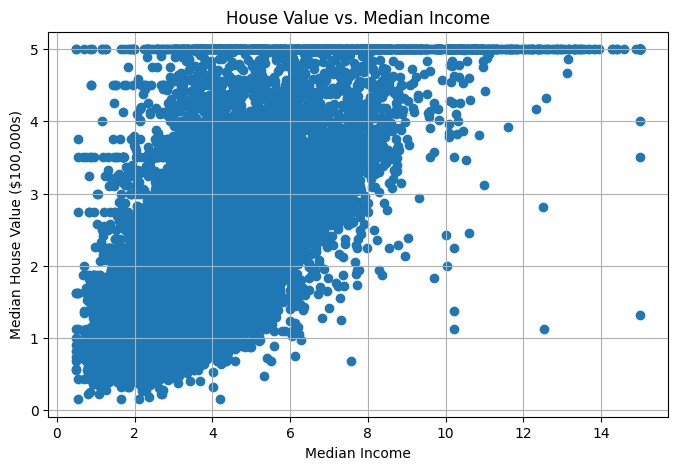

In [ ]:
#Visualizing the data
plt.figure(figsize=(8,5))
plt.scatter(x,y)
plt.xlabel("Median Income")
plt.ylabel("Median House Value ($100,000s)")
plt.title("House Value vs. Median Income")
plt.grid(True)
plt.show()

In [ ]:
#normalizing the data for gradient descent to work well
x_norm = (x-x.mean())/x.std() #z-score normalization

In [ ]:
x_norm.shape

(20640, 1)

In [ ]:
# Mean Squared Error cost function:

def compute_cost(X, y, w, b): #X: vector of feature values, y: vector of target values
  m=len(y) #m: number of training examples
  cost = 0
  for i in range(m):
    prediction = w*X[i]+b
    target = y[i]
    error = prediction - target
    cost += error**2

  cost /= 2*m
  return cost


In [ ]:
print(compute_cost(x_norm, y, 0, 0))

[2.8052416]


In [ ]:
def compute_gradient(X, y, w, b):
  m = len(y)
  dj_dw = 0
  dj_db = 0

  #for i in range(m):
    #dj_dw += ((w*X[i]+b) - y[i])*X[i]
    #dj_db += (w*X[i]+b)-y[i]

  #dj_dw /= m
  #dj_db /= m
  y = y.reshape(-1,1)
  predictions = w*X+b
  errors = predictions - y
  dj_dw = np.sum(errors*X)/m
  dj_db = np.sum(errors)/m

  return dj_dw, dj_db


In [ ]:
print(compute_gradient(x_norm, y, 0, 0))

(np.float64(-0.7939893889648998), np.float64(-2.068558169089147))


In [ ]:
def gradient_descent(X, y, w, b, alpha, iterations):
  for i in range(iterations):
    if i in {99,199,299,399,499,599,699,799,899,999,1099,1199,1299,1399,1499}:
      print(f"Cost at {i+1}th iteration: {compute_cost(X, y, w, b)}")

    dj_dw, dj_db = compute_gradient(X, y, w, b)
    w_temp = w - alpha*dj_dw
    b_temp = b - alpha*dj_db
    w = w_temp
    b = b_temp

  return w, b

In [ ]:
w, b = gradient_descent(x_norm, y, 0, 0, 0.01, 1500)
print(f"The optimal value of parameters are: w = {w} and b = {b}")

Cost at 100th iteration: [0.6861198]
Cost at 200th iteration: [0.39552302]
Cost at 300th iteration: [0.35658896]
Cost at 400th iteration: [0.35137259]
Cost at 500th iteration: [0.3506737]
Cost at 600th iteration: [0.35058006]
Cost at 700th iteration: [0.35056752]
Cost at 800th iteration: [0.35056584]
Cost at 900th iteration: [0.35056561]
Cost at 1000th iteration: [0.35056558]
Cost at 1100th iteration: [0.35056558]
Cost at 1200th iteration: [0.35056558]
Cost at 1300th iteration: [0.35056558]
Cost at 1400th iteration: [0.35056558]
Cost at 1500th iteration: [0.35056558]
The optimal value of parameters are: w = 0.7939891637450861 and b = 2.0685575823303157


In [ ]:
pred = w*x_norm+b

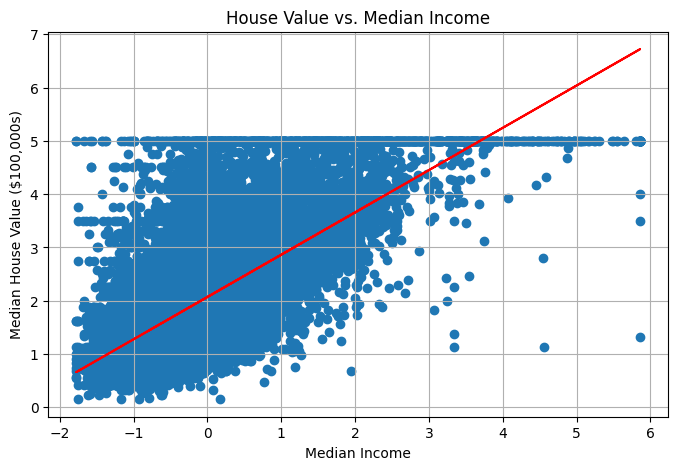

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(x_norm,y)
plt.plot(x_norm, pred, color = 'r')
plt.xlabel("Median Income")
plt.ylabel("Median House Value ($100,000s)")
plt.title("House Value vs. Median Income")
plt.grid(True)
plt.show()